In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv(r'C:\Users\vrssv\Desktop\Project (Mine)\Beginner Projects\Orders.csv')

In [3]:
returns = pd.read_csv(r'C:\Users\vrssv\Desktop\Project (Mine)\Beginner Projects\Returns.csv')

In [4]:
products = pd.read_csv(r'C:\Users\vrssv\Desktop\Project (Mine)\Beginner Projects\Products.csv')

In [5]:
customers = pd.read_csv(r'C:\Users\vrssv\Desktop\Project (Mine)\Beginner Projects\Customers.csv')

In [6]:
orders.head()

,OrderID,CustomerID,OrderDate,ProductID,Quantity,SalesAmount
0,2001,1035,2023-02-16,539,2,412.64
1,2002,1081,2023-10-15,540,3,986.34
2,2003,1090,2023-09-23,517,3,742.80
3,2004,1008,2023-01-16,537,9,4241.79
4,2005,1093,2023-07-18,539,7,1444.24


In [7]:
returns.head()

,OrderID,ReturnDate
0,2259,2023-10-19
1,2963,2023-10-30
2,2306,2023-10-13
3,2085,2023-12-10
4,2033,2024-01-24


In [8]:
products.head()

,ProductID,Category,Subcategory,Price
0,501,Furniture,Accessories,336.89
1,502,Office Supplies,Phones,154.37
2,503,Furniture,Accessories,478.34
3,504,Technology,Binders,374.19
4,505,Technology,Binders,286.09


In [9]:
customers.head()

,CustomerID,Name,Location,Segment
0,1001,Customer_0,East,Home Office
1,1002,Customer_1,West,Home Office
2,1003,Customer_2,North,Consumer
3,1004,Customer_3,East,Consumer
4,1005,Customer_4,East,Corporate


**What is the total return rate?**

In [11]:
total_orders = orders['OrderID'].nunique() #Total number of orders
returned_orders = returns['OrderID'].nunique() #Total number of returns
return_rate = returned_orders/total_orders * 100

print(f"Total Orders:{total_orders}") # Syntax = f"some text {expression_or_variable}
print(f"Returned Orders : {returned_orders}")
print(f"Return Rate : {return_rate:.2f}%") #f : to start a formatted string and {return_rate:.2f} → inserts the value of return_rate, rounded to 2 decimal places


Total Orders:1000
Returned Orders : 100
Return Rate : 10.00%


**Which products or categories have the highest return rate?**

In [13]:
orders['IsReturned'] = orders['OrderID'].isin(returns['OrderID'])

This line creates a new column in the orders DataFrame called IsReturned
    It checks: “Is this order's OrderID present in the Returns.csv file?”
    The result will be:
        True if the order was returned
        False if it wasn’t

In [15]:
orders.head()

,OrderID,CustomerID,OrderDate,ProductID,Quantity,SalesAmount,IsReturned
0,2001,1035,2023-02-16,539,2,412.64,False
1,2002,1081,2023-10-15,540,3,986.34,False
2,2003,1090,2023-09-23,517,3,742.80,False
3,2004,1008,2023-01-16,537,9,4241.79,False
4,2005,1093,2023-07-18,539,7,1444.24,False


In [16]:
orders_with_products = orders.merge(products[['ProductID','Category','Subcategory']], on='ProductID')

In [17]:
orders_with_products.head()

,OrderID,CustomerID,OrderDate,ProductID,Quantity,SalesAmount,IsReturned,Category,Subcategory
0,2001,1035,2023-02-16,539,2,412.64,False,Technology,Tables
1,2002,1081,2023-10-15,540,3,986.34,False,Office Supplies,Binders
2,2003,1090,2023-09-23,517,3,742.80,False,Office Supplies,Tables
3,2004,1008,2023-01-16,537,9,4241.79,False,Furniture,Binders
4,2005,1093,2023-07-18,539,7,1444.24,False,Technology,Tables


Merge orders with products

In [19]:
category_stats = orders_with_products.groupby('Category').agg(TotalOrders=('OrderID','count'),ReturnedOrders=('IsReturned','sum'))

In [20]:
category_stats.head()

,TotalOrders,ReturnedOrders
Category,,
Furniture,298,26
Office Supplies,383,31
Technology,319,43


In [21]:
category_stats['ReturnRate (%)'] = (category_stats['ReturnedOrders']/category_stats['TotalOrders']) *100
category_stats = category_stats.sort_values(by='ReturnRate (%)', ascending = False)

print("Return Rate by Category:")
print(category_stats.round(2))

Return Rate by Category:
                 TotalOrders  ReturnedOrders  ReturnRate (%)
Category                                                    
Technology               319              43           13.48
Furniture                298              26            8.72
Office Supplies          383              31            8.09


**What is the total revenue lost due to returns?**

In [23]:
returned_orders = orders[orders['OrderID'].isin(returns['OrderID'])]

This line filters the orders DataFrame to only include the orders that exist in the returns file — i.e., the returned orders.
The result is stored in a new DataFrame called returned_orders.

🔹 returns['OrderID']

This gives you a list (or Series) of all returned order IDs from the Returns.csv file.

🔹 orders['OrderID'].isin(...)

This checks:
    For each order in the orders DataFrame, is its OrderID present in the returns['OrderID'] list?

In [25]:
returned_orders.head()

,OrderID,CustomerID,OrderDate,ProductID,Quantity,SalesAmount,IsReturned
8,2009,1115,2023-09-27,539,4,825.28,True
11,2012,1196,2023-01-07,535,7,229.11,True
14,2015,1075,2023-11-24,528,5,1602.05,True
22,2023,1152,2023-06-08,527,3,599.43,True
32,2033,1012,2023-12-30,513,8,336.64,True


In [26]:
revenue_lost = returned_orders['SalesAmount'].sum()

In [27]:
print(f"Total revenue lost Due to Returns: {revenue_lost:,.2f}")

Total revenue lost Due to Returns: 128,179.07


**Which customer segments return products the most?**

In [29]:
orders['IsReturned'] = orders['OrderID'].isin(returns['OrderID'])

In [30]:
orders.head()

,OrderID,CustomerID,OrderDate,ProductID,Quantity,SalesAmount,IsReturned
0,2001,1035,2023-02-16,539,2,412.64,False
1,2002,1081,2023-10-15,540,3,986.34,False
2,2003,1090,2023-09-23,517,3,742.80,False
3,2004,1008,2023-01-16,537,9,4241.79,False
4,2005,1093,2023-07-18,539,7,1444.24,False


In [31]:
order_with_segment = orders.merge(customers[['CustomerID','Segment']], on='CustomerID')

In [32]:
order_with_segment.head()

,OrderID,CustomerID,OrderDate,ProductID,Quantity,SalesAmount,IsReturned,Segment
0,2001,1035,2023-02-16,539,2,412.64,False,Consumer
1,2002,1081,2023-10-15,540,3,986.34,False,Corporate
2,2003,1090,2023-09-23,517,3,742.80,False,Corporate
3,2004,1008,2023-01-16,537,9,4241.79,False,Home Office
4,2005,1093,2023-07-18,539,7,1444.24,False,Home Office


In [33]:
segment_return = order_with_segment.groupby('Segment')['IsReturned'].sum().sort_values(ascending=False)

In [34]:
print('Returned Orders by Customer Segment:')
print(segment_return)

Returned Orders by Customer Segment:
Segment
Consumer       36
Corporate      35
Home Office    29
Name: IsReturned, dtype: int64


*This shows that "Consumer" segment had the most returns*

**What is the net profit (sales-returns) by region?**

In [37]:
orders['IsReturned'] = orders['OrderID'].isin(returns['OrderID'])
orders_with_region = orders.merge(customers[['CustomerID','Location']], on='CustomerID')

region_stats = orders_with_region.groupby('Location').agg(
    TotalSales = ('SalesAmount','sum'),
    ReturnSales = ('SalesAmount', lambda x: x[orders_with_region.loc[x.index, 'IsReturned']].sum())
)

What Each Part Does:

🧩 x

This is the SalesAmount column for the current group (e.g., all sales from the South region)

🧩 x.index

The row indices (row numbers) for this region's subset of data.

🧩 orders_with_region.loc[x.index, 'IsReturned']

This fetches the IsReturned values (True or False) for just those rows in this group.

🧩 x[ ... ]

We then filter the SalesAmount values where IsReturned == True.

🧩 .sum()

Adds up the filtered sales amounts — giving us total return sales for that region.

In [39]:
region_stats['NetProfit'] = region_stats['TotalSales'] - region_stats['ReturnSales']

In [40]:
region_stats = region_stats.round(2)

In [41]:
print(f"Netprofit by region:")
print(region_stats)

Netprofit by region:
          TotalSales  ReturnSales  NetProfit
Location                                    
East       331359.01     38900.95  292458.06
North      263631.59     30186.46  233445.13
South      246551.45     17159.21  229392.24
West       313573.95     41932.45  271641.50


In [42]:
import matplotlib.pyplot as plt

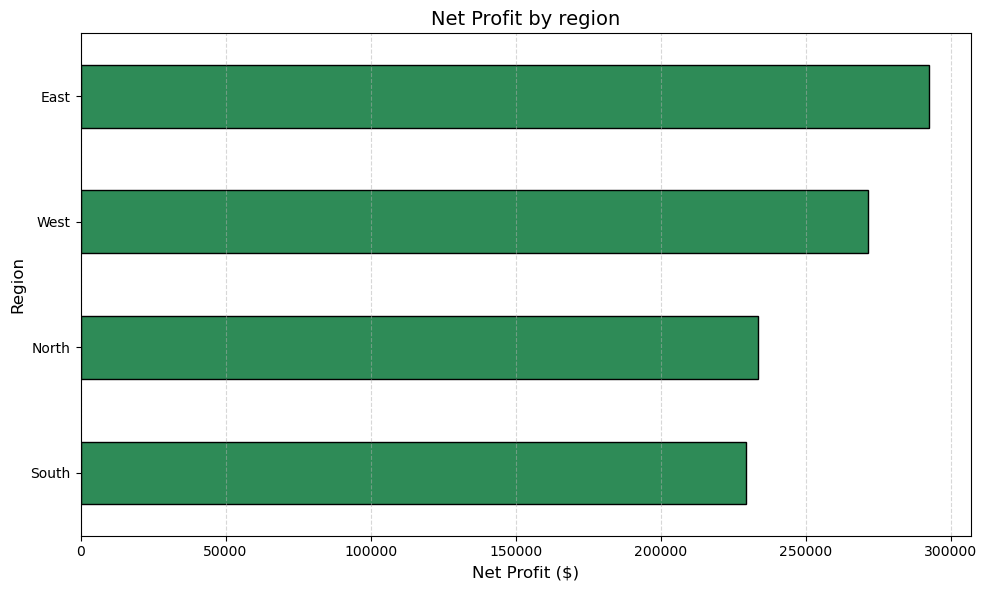

In [43]:
plt.figure(figsize=(10,6))
region_stats.sort_values('NetProfit',ascending=True)['NetProfit'].plot(
    kind='barh',color='seagreen', edgecolor = 'black'
)

plt.title ('Net Profit by region', fontsize = 14)
plt.xlabel('Net Profit ($)', fontsize = 12)
plt.ylabel('Region', fontsize = 12)
plt.grid(axis='x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

**Are high-return customers also the top spenders ?**

Logic : Compare customers with the highest number of returns vs customers who spent the most overall.

In [46]:
orders['IsReturned'] = orders['OrderID'].isin(returns['OrderID'])
total_spent = orders.groupby('CustomerID')['SalesAmount'].sum().rename('TotalSpent')
returns_count = orders.groupby('CustomerID')['IsReturned'].sum().rename('NumReturns')
customer_stats = pd.concat([total_spent, returns_count], axis =1)

In [47]:
print(customer_stats)

            TotalSpent  NumReturns
CustomerID                        
1001          10238.57           2
1002           2666.07           0
1003           5464.79           0
1004           3146.21           0
1005          13493.26           0
...                ...         ...
1196           2413.08           2
1197           3028.19           0
1198           9290.75           0
1199           3517.95           0
1200           5973.82           0

[199 rows x 2 columns]


In [48]:
customer_stats['ReturnRate (%)'] = (customer_stats['NumReturns']/orders.groupby('CustomerID')['OrderID'].count())*100

In [49]:
print(customer_stats)

            TotalSpent  NumReturns  ReturnRate (%)
CustomerID                                        
1001          10238.57           2       18.181818
1002           2666.07           0        0.000000
1003           5464.79           0        0.000000
1004           3146.21           0        0.000000
1005          13493.26           0        0.000000
...                ...         ...             ...
1196           2413.08           2       66.666667
1197           3028.19           0        0.000000
1198           9290.75           0        0.000000
1199           3517.95           0        0.000000
1200           5973.82           0        0.000000

[199 rows x 3 columns]


In [50]:
top_spenders = customer_stats.sort_values(by='TotalSpent',ascending=False).head(10)
top_returns = customer_stats.sort_values(by="NumReturns",ascending=False).head(10)

In [51]:
print("Top 10 Customers by Total Spend:")
print(top_spenders)

Top 10 Customers by Total Spend:
            TotalSpent  NumReturns  ReturnRate (%)
CustomerID                                        
1109          19874.17           0        0.000000
1047          16478.96           2       16.666667
1008          15953.72           0        0.000000
1042          15019.73           1       16.666667
1111          14174.10           1       11.111111
1086          14016.42           0        0.000000
1005          13493.26           0        0.000000
1179          13093.62           1        8.333333
1017          12758.83           3       37.500000
1038          12686.49           0        0.000000


In [52]:
print("Top 10 customers by Number of Returns:")
print(top_returns)

Top 10 customers by Number of Returns:
            TotalSpent  NumReturns  ReturnRate (%)
CustomerID                                        
1115          11150.48           3       30.000000
1006           6737.46           3       75.000000
1113           9042.52           3       30.000000
1017          12758.83           3       37.500000
1046           6803.85           2       33.333333
1047          16478.96           2       16.666667
1067           5737.87           2       50.000000
1075           7301.27           2       28.571429
1190           7628.80           2       28.571429
1166           9156.85           2       25.000000


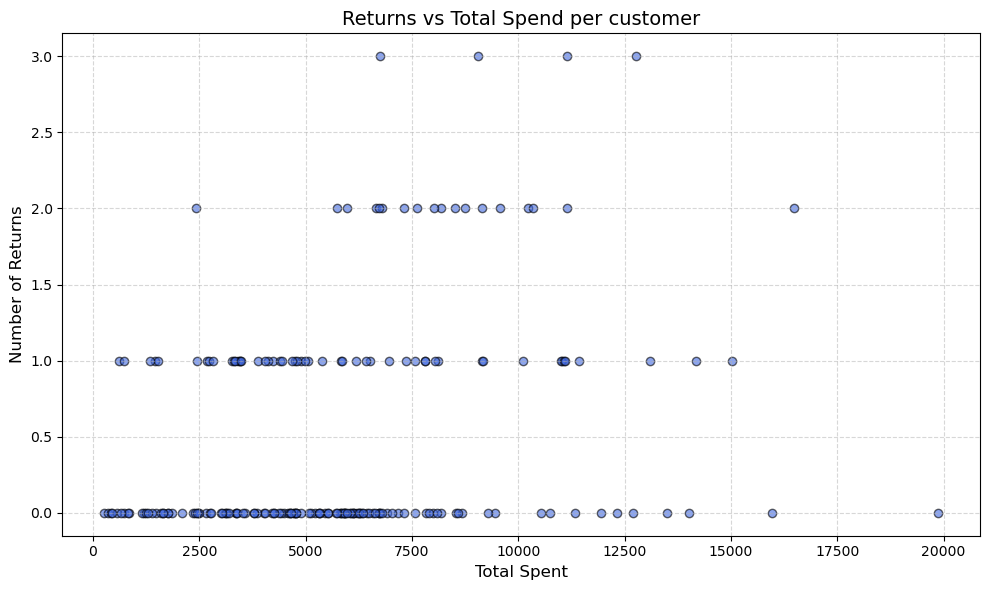

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(customer_stats['TotalSpent'], customer_stats['NumReturns'],
            c = 'royalblue', alpha = 0.6, edgecolors = 'black')
plt.title('Returns vs Total Spend per customer', fontsize = 14)
plt.xlabel('Total Spent', fontsize = 12)
plt.ylabel('Number of Returns', fontsize = 12)
plt.grid(True, linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

Points far right = high spenders

Points high up = many returns

Bottom-right corner = best customers: big spenders, low returners 

Top-left corner = worst customers: return a lot, spend little 